# Obdelava 40. vaje

## WHEATSTONOV MOST

Gregor Žunič, 21.4.2020

## Uvod

Če na električni prevodnik delujemo z enosmerno napetostjo $U$, skozi njega teče tok $I$. Razmere med napetostjo in tokom je upor $R$:
$$ R = \frac{U}{I} $$
$ R = [\Omega =  \frac{V}{A}] $ (ohm).
Upor je odvisen od oblike upornika in njegovega specifičnega upora $\zeta$. Velja enačba
$$ R = \frac{\zeta l}{S} $$
$l$ je dolžina, $S$ pa presek upornika.
Upor se da zelo natančno meriti z Wheatstonovim mostom, na katerem primerjamo
napetosti v dveh tokovnih vejah električnega kroga (glej sliko). Pri odklopljenem
galvanometru se napetost med točkama $A$ in $B$ razdeli v prvi veji v razmerju $\frac{R_1}{R_2}$, v drugi veji pa $\frac{R_3}{R_4}$. Če je razmerje enako, toka po sredini (galvanometer) ni.
En upor lahko izračunamo kot
$$ \frac{R_1}{R_2} = \frac{R_3}{R_4} $$
Pri šolski izvedbi je ena veja Wheatstonovega mosta, npr. ADB, narejena iz
enakomerno debele uporovne žice. Upora $R_3$ in $R_4$ sta tedaj sorazmerna z dolžinama
odsekov $AD = a$ in $DB = l − a$. Z drsnikom poiščemo tisto točko $D$, pri kateri skozi
galvanometer ni toka. Neznani upor je:
$$ R_x = R_0 \frac{a}{l-a} $$

## Naloga

Izmeri upora danega upornika in žice. Izračunaj specifični upor žice!

## Obdelava in rezultati

In [55]:
import csv
from scipy.optimize import curve_fit
from scipy import stats
import math
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from IPython.display import display, Image
from tabela_negotovosti_v1 import Negotovost

## 1. del

In [56]:
#podatki za prvo zico
l1 = (101.3, 0.2) # cm
d1 = (0.22, 0.02) # mm

podatki_zica1 = pd.read_csv("meritve_zica1.csv", comment='#')
# ohm, cm, cm
display(podatki_zica1)

,R0,a,l-a
0,2000,77.9,23.8
1,3000,68.9,32.2
2,4000,61.9,37.1
3,5000,57.6,44.6
4,6000,51.7,49.3
5,7000,47.6,52.4
6,8000,44.2,56.3
7,9000,42.3,60.3
8,10000,37.7,60.5


$R_x$ torej izračunamo po formuli
$$ R_x = R_0 \frac{a}{l-a} $$
tako, da narišemo graf.

In [57]:
y = podatki_zica1['R0']
x = podatki_zica1['l-a'] / podatki_zica1['a']
print(x,y)

0    0.305520
1    0.467344
2    0.599354
3    0.774306
4    0.953578
5    1.100840
6    1.273756
7    1.425532
8    1.604775
dtype: float64 0     2000
1     3000
2     4000
3     5000
4     6000
5     7000
6     8000
7     9000
8    10000
Name: R0, dtype: int64


In [58]:
def fit_func(x, a, b):
    return x*a+b

In [59]:
def draw_calc(x,y,num):
    params = curve_fit(
        fit_func, x, y)
    a = params[0][0]
    b = params[0][1]

    # CALCULATE ERRORS FROM MATRIX
    errs = np.sqrt(np.diag(params[1]))
    print('a =', a,'Ohm','+-',errs[0],'Ohm', '\nb =', b,'+-',errs[1])

    x_fit = np.linspace(0, max(x), 100)

    y_fit = fit_func(x_fit,a, b)

    plt.plot(x, y, 'o')
    plt.plot(x_fit, y_fit, label=r'k = $R_x$')

    plt.title(f'Izračun neznanega upora - {num} žica')
    plt.xlabel(r'$\frac{l-a}{a}$')
    plt.ylabel(r'$R_0$ [$\Omega$]')

    plt.legend()
    plt.show()
    
    return (a,errs[0])

a = 6151.994324278348 Ohm +- 57.75843983983768 Ohm 
b = 186.3626249672531 +- 59.71967980060212


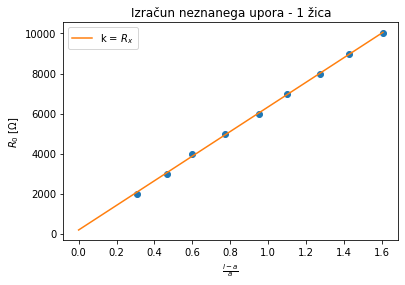

In [60]:
omega1 = draw_calc(x,y,1)

Upor neznanega upornika $R_x = 5151 \pm 58 \: \Omega$.
Napaka je izračunana po metodi MSQE.

## 2. del

Izračun za uporovno žico

In [61]:
#podatki za uporovno zico
l2 = (103.6, 0.2) # cm
d2 = (0.44, 0.02) # mm

uporovna_zica = pd.read_csv("meritve_zica2.csv", comment='#')
# ohm, cm, cm
display(uporovna_zica)

,R0,a,l-a
0,5,61.6,37.1
1,6,57.0,42.6
2,6,53.9,47.4
3,8,50.1,50.6
4,9,46.4,55.2
5,10,44.1,56.8


In [62]:
y = uporovna_zica['R0']
x = uporovna_zica['l-a'] / uporovna_zica['a']
print(x,y)

0    0.602273
1    0.747368
2    0.879406
3    1.009980
4    1.189655
5    1.287982
dtype: float64 0     5
1     6
2     6
3     8
4     9
5    10
Name: R0, dtype: int64


a = 7.354018743649618 Ohm +- 0.7777726117043551 Ohm 
b = 0.32659031826364493 +- 0.7639666592908864


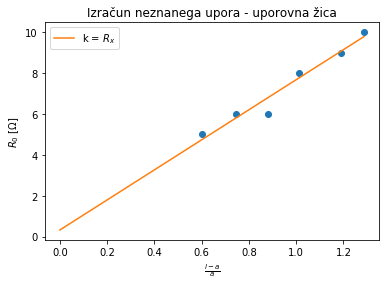

In [63]:
omega_zica = draw_calc(x,y,'uporovna')

Upor uporne žice $R_z = 7.34 \pm 0.78 \: \Omega$.

Specifični upor žice lahko zračunamo kot:
$$ \zeta = \frac{R S}{l} $$

In [64]:
data = [
        ('R_z', omega_zica[0], omega_zica[1]),
        ('d', d2[0]*10**-3, d2[1]*10**-3),
        ('l', l2[0]*10**-2, l2[1]*10**-2),
    ]

function = 'R_z * (pi*(d/2)^2) / l'

Negotovost(data,function,floating_points=4).draw_table(units=r'\Omega m',text_size=16,variable='\zeta')

<IPython.core.display.Latex object>

,$\frac{\partial \zeta}{\partial x_i}$,$\sigma_i$,$\sigma_i \cdot \frac{\partial \zeta}{\partial x_i}$
$R_{z}$,$\frac{\pi d^{2}}{4 l}$,7.7777E-01,1.1415E-07
$d$,$\frac{\pi R_{z} d}{2 l}$,2.0000E-05,9.8122E-08
$l$,$- \frac{\pi R_{z} d^{2}}{4 l^{2}}$,2.0000E-03,-2.0837E-09


<IPython.core.display.Latex object>

Specifični upor žice je
$$ \zeta = (1.07 \pm 0.15) \cdot 10^{-6} \: \Omega m $$

## Vprašanja & odgovori

1. Kolikšna je relativna napaka rezultata, ki jo prinese nenatančno odčitavanje, če si določil lego drsnika na 0,5 mm natančno pri 1 m dolgi merilni žici?
Odvisno kako merimo oba dela, ampak ker smo merili oba dela posebej, zato ne pride do kolerirane napake, torej se relativne napake obeh meritev samo seštejeta. ($ \delta a + \delta (l-a) $)
Če bi x zmerili samo enkrat bi bila nato napak malo drugačna, ($\Delta a \cdot \frac{\delta(l-a)/a}{\delta a}$).


2. Kako je relativna napaka rezultata odvisna od razmerja R x /R 0 , torej od lege točke D? Katero že omenjeno navodilo sledi iz tega?
Je enako razmerju $\frac{a}{l-a}$. Napaka razmerja je enaka napaki iz prejšnega vprašanja.